# Reproduce figures

This notebook reproduces the figures shown in the manuscript

> Bodenmann L., Baker J.W. , Stojadinović B. (2023): "Accounting for ground motion uncertainty in empirical seismic fragility modeling", Engineering Archive [preprint], [doi:10.31224/3336](https://doi.org/10.31224/3336).

In [1]:
# Settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import xarray as xr

from utils_figures import textwidth

## One-Dimensional Example

In [2]:
data_dir = os.path.join('data', 'tutorial1', '')
res_dir = os.path.join('results', 'tutorial1', '')

In [3]:
from bayesfrag.postprocess import PointEstimates, Posterior

dfsurvey = pd.read_csv(data_dir + 'survey_withIM_PGA.csv')
dfstation = pd.read_csv(data_dir + 'stations_withIM_PGA.csv')

params_Bayes = Posterior.from_netcdf(res_dir + 'Bayesian_frag_OneDim_im_PGA.nc')
params_fixedIM = PointEstimates.from_netcdf(res_dir + 'FixedIM_frag_OneDim_im_PGA.nc')
params_true = PointEstimates.from_netcdf(data_dir + 'True_frag_OneDim.nc')

res_IM = xr.load_dataset(res_dir + 'IMresults_OneDim_PGA.nc')

### Figure 2

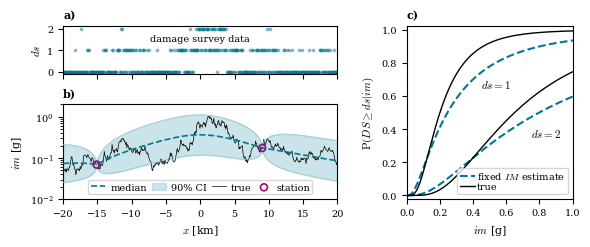

In [4]:
from utils_figures import _figures2_3

fig = plt.figure(constrained_layout=True, figsize=(0.98*textwidth, 0.4*textwidth))
_figures2_3(fig, dfsurvey, dfstation, params_fixedIM, params_true, 
            res_IM, inf='fixedIM')
plt.show()

### Figure 3

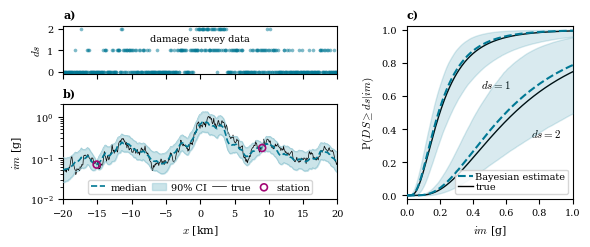

In [5]:
from utils_figures import _figures2_3

fig = plt.figure(constrained_layout=True, figsize=(0.98*textwidth, 0.4*textwidth))
_figures2_3(fig, dfsurvey, dfstation, params_Bayes, params_true, 
            res_IM, inf='Bayes')
plt.show()

## L'Aquila case study

In [6]:
res_dir = os.path.join('results', 'aquila', '')

### Figure 6

In [7]:
imstr = 'SAT0_300'
gmmcombo = 1
seed = 31

file = ('Bayesian_frag_Aquila_im' + imstr + '_GMMcombo' + str(gmmcombo) + 
           '_seedsubsampling' + str(seed) + '.nc')

params_Bayes = Posterior.from_netcdf(res_dir + file)

file = ('FixedIM_frag_Aquila_im' + imstr + '_GMMcombo' + str(gmmcombo) + '.nc')

params_fixedIM = PointEstimates.from_netcdf(res_dir + file)

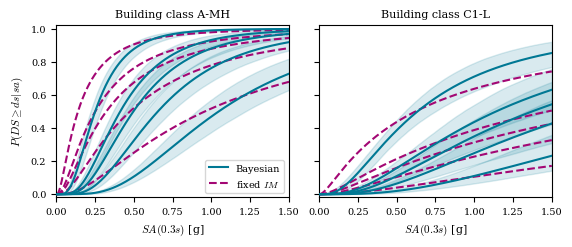

In [8]:
from utils_figures import ethPetrol, ethPurpur, SMALL_SIZE
im = np.linspace(0.001,1.5,500)
bcs = ['A-MH', 'C1-L']

fig, axs = plt.subplots(1,2,figsize=(0.95*textwidth, 0.4*textwidth), sharey=True,
                         constrained_layout=True)
for bc, ax in zip(bcs, axs):
    params_Bayes.plot_frag_funcs(ax, bc=bc, im=im, color = ethPetrol, 
                        kwargsm={'ls': '-', 'lw': 1.5, 'label': r'Bayesian', 'zorder': 3},
                        kwargsCI={'alpha': 0.15, 'zorder': 1})
    params_fixedIM.plot_frag_funcs(ax, bc=bc, im=im, color = ethPurpur, 
                        kwargs={'ls': '--', 'lw': 1.5, 'label': r'fixed $\mathit{IM}$', 'zorder': 2})
    ax.set_ylim([-0.02,1.02])
    ax.set_xlim([0, 1.5])
    ax.set_xlabel('$SA(0.3s)$ [g]')
    ax.set_title('Building class ' + str(bc))
    if bc == bcs[0]:
        ax.set_ylabel('$P(DS \geq ds|sa)$')
        ax.legend(fontsize=SMALL_SIZE)
plt.show()

### Table 3: Estimated parameters

In [9]:
dfmb = params_Bayes.get_mean_fragparams().reset_index()
dfmb['Approach'] = 'Bayesian'
dfmf = params_fixedIM.get_fragparams().reset_index()
dfmf['Approach'] = 'fixed IM'
pd.concat([dfmf, dfmb]).set_index(['Approach', 'bc']).round(2)

beta  theta1  theta2  theta3  theta4  theta5
Approach bc                                                 
fixed IM A-L    1.09    0.18    0.31    0.39    0.60    1.13
         A-MH   0.96    0.14    0.25    0.32    0.48    0.96
         B-L    1.20    0.39    0.78    1.01    1.50    2.65
         B-MH   1.20    0.29    0.60    0.78    1.15    2.19
         C1-L   1.35    0.62    1.47    1.93    2.76    5.43
         C1-MH  1.17    0.46    1.03    1.35    2.01    3.16
Bayesian A-L    0.68    0.30    0.46    0.55    0.73    1.13
         A-MH   0.59    0.25    0.41    0.50    0.66    1.05
         B-L    0.81    0.47    0.82    0.99    1.33    2.00
         B-MH   0.75    0.37    0.65    0.79    1.05    1.62
         C1-L   0.82    0.63    1.14    1.37    1.74    2.73
         C1-MH  0.75    0.52    0.93    1.13    1.49    2.01

### Figure 7: Results using alternate IMs

In [10]:
gmmcombo = 1
seed = 31

beta_Bayes = dict(); beta_fixedIM = dict()
for imstr in ['PGA', 'SAT0_300']:
    file = ('Bayesian_frag_Aquila_im' + imstr + '_GMMcombo' + str(gmmcombo) + 
            '_seedsubsampling' + str(seed) + '.nc')
    tempdd = Posterior.from_netcdf(res_dir + file)
    beta_Bayes[imstr] = tempdd.samples.beta.values
    file = ('FixedIM_frag_Aquila_im' + imstr + '_GMMcombo' + str(gmmcombo) + '.nc')
    tempd = PointEstimates.from_netcdf(res_dir + file)
    beta_fixedIM[imstr] = tempd.params.beta.values
    bcs = tempd.params.bc.values


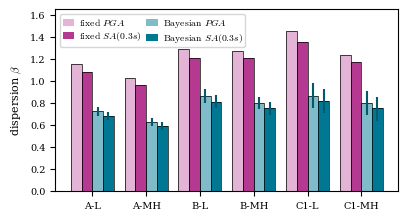

In [11]:
from utils_figures import _figure7
fig, ax = plt.subplots(figsize=(0.75*textwidth, 0.4*textwidth))
_figure7(ax, bcs,beta_fixedIM, beta_Bayes)
plt.show()

### Figure 8: Comparison for different GMMs

In [12]:
imstr = 'SAT0_300'
seed = 31

params_Bayes = dict(); params_fixedIM = dict()
for gmmcombo in [1, 2]:
    file = ('Bayesian_frag_Aquila_im' + imstr + '_GMMcombo' + str(gmmcombo) + 
            '_seedsubsampling' + str(seed) + '.nc')
    params_Bayes[gmmcombo] = Posterior.from_netcdf(res_dir + file)
    beta_Bayes[imstr] = tempdd.samples.beta.values
    file = ('FixedIM_frag_Aquila_im' + imstr + '_GMMcombo' + str(gmmcombo) + '.nc')
    params_fixedIM[gmmcombo] = PointEstimates.from_netcdf(res_dir + file)


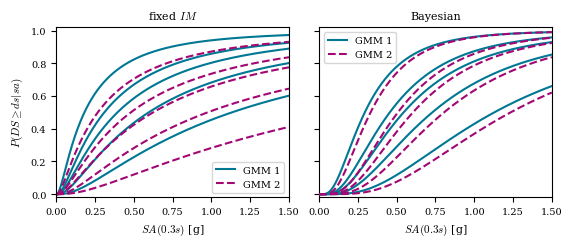

In [13]:
from utils_figures import ethPetrol, ethPurpur, SMALL_SIZE
im = np.linspace(0.001,1.5,500)
bc = ['A-L']
params = [params_Bayes, params_fixedIM]
fig, axs = plt.subplots(1,2,figsize=(0.95*textwidth, 0.4*textwidth), sharey=True,
                         constrained_layout=True)
titles = ['fixed $\mathit{IM}$', 'Bayesian']
for i, ax in enumerate(axs):
    if i == 1:
        params_Bayes[1].plot_frag_funcs(ax, bc=bc, im=im, color = ethPetrol, includeCI=False,
                            kwargsm={'ls': '-', 'lw': 1.5, 'label': r'GMM 1', 'zorder': 3})
        params_Bayes[2].plot_frag_funcs(ax, bc=bc, im=im, color = ethPurpur, includeCI=False,
                            kwargsm={'ls': '--', 'lw': 1.5, 'label': r'GMM 2', 'zorder': 3})
    elif i == 0:
        params_fixedIM[1].plot_frag_funcs(ax, bc=bc, im=im, color = ethPetrol, 
                            kwargs={'ls': '-', 'lw': 1.5, 'label': r'GMM 1', 'zorder': 2})
        params_fixedIM[2].plot_frag_funcs(ax, bc=bc, im=im, color = ethPurpur, 
                            kwargs={'ls': '--', 'lw': 1.5, 'label': r'GMM 2', 'zorder': 2})
    ax.set_ylim([-0.02,1.02])
    ax.set_xlim([0, 1.5])
    ax.set_xlabel('$SA(0.3s)$ [g]')
    ax.set_title(titles[i])
    if i == 0:
        ax.set_ylabel('$P(DS \geq ds|sa)$')
    ax.legend(fontsize=SMALL_SIZE)
plt.show()

### Figure 10: Effect of data sub-sampling

In [14]:
imstr = 'SAT0_300'
gmmcombo = 1

beta_Bayes = dict(); 
for k, seed in enumerate([11, 21, 31, 41]):
    file = ('Bayesian_frag_Aquila_im' + imstr + '_GMMcombo' + str(gmmcombo) + 
            '_seedsubsampling' + str(seed) + '.nc')
    tempdd = Posterior.from_netcdf(res_dir + file)
    beta_Bayes[k] = tempdd.samples.beta.values
    
file = ('FixedIM_frag_Aquila_im' + imstr + '_GMMcombo' + str(gmmcombo) + '.nc')
tempd = PointEstimates.from_netcdf(res_dir + file)
beta_fixedIM = tempd.params.beta.values
bcs = tempd.params.bc.values

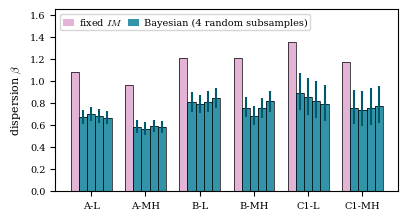

In [15]:
from utils_figures import _figure10
fig, ax = plt.subplots(figsize=(0.75*textwidth, 0.4*textwidth))
_figure10(ax, bcs, beta_fixedIM, beta_Bayes)
plt.show()

### Figure 11: Simulated damage

In [16]:
res_dir = os.path.join('results', 'aquila', 'simulated', '')

In [17]:
imstr = 'SAT0_300'
seed = 31
gmmcombo = 1

file = ('Bayesian_frag_simAquila_im' + imstr + '_GMMcombo' + str(gmmcombo) + 
        '_seedsubsampling' + str(seed) + '.nc')
params_Bayes= Posterior.from_netcdf(res_dir + file)
file = ('FixedIM_frag_simAquila_im' + imstr + '_GMMcombo' + str(gmmcombo) + '.nc')
params_fixedIM = PointEstimates.from_netcdf(res_dir + file)
file = ('True_frag_simAquila_im' + imstr + '.nc')
params_true = PointEstimates.from_netcdf(res_dir + file)

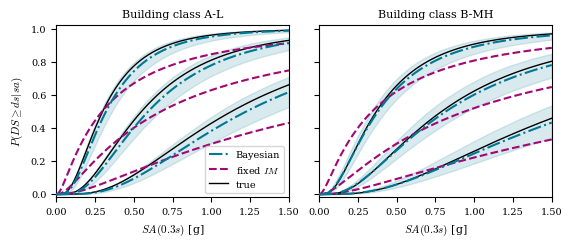

In [19]:
from utils_figures import ethPetrol, ethPurpur, SMALL_SIZE
im = np.linspace(0.001,1.5,500)
bcs = ['A-L', 'B-MH']

fig, axs = plt.subplots(1,2,figsize=(0.95*textwidth, 0.4*textwidth), sharey=True,
                         constrained_layout=True)
for bc, ax in zip(bcs, axs):
    params_Bayes.plot_frag_funcs(ax, bc=bc, im=im, color = ethPetrol, ds_subset=[1,3,5],
                        kwargsm={'ls': '-.', 'lw': 1.5, 'label': r'Bayesian', 'zorder': 4},
                        kwargsCI={'alpha': 0.15, 'zorder': 1})
    params_fixedIM.plot_frag_funcs(ax, bc=bc, im=im, color = ethPurpur, ds_subset=[1,3,5],
                        kwargs={'ls': '--', 'lw': 1.5, 'label': r'fixed $\mathit{IM}$', 'zorder': 3})
    params_true.plot_frag_funcs(ax, bc=bc, im=im, color = 'black', ds_subset=[1,3,5],
                        kwargs={'ls': '-', 'lw': 1.0, 'label': r'true', 'zorder': 2})
    ax.set_ylim([-0.02,1.02])
    ax.set_xlim([0, 1.5])
    ax.set_xlabel('$SA(0.3s)$ [g]')
    ax.set_title('Building class ' + str(bc))
    if bc == bcs[0]:
        ax.set_ylabel('$P(DS \geq ds|sa)$')
        ax.legend(fontsize=SMALL_SIZE)
plt.show()